problem 5

In [1]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('data.csv')
#指定列
data=data.drop(["User id"],axis=1)
data.columns = ['Age','Incoming','Student','Credit Rating',"Buying"]

#sparse=False意思是不产生稀疏矩阵
vec=DictVectorizer(sparse=False)
#先用 pandas 对每行生成字典，然后进行向量化
feature = data[['Age','Incoming','Student','Credit Rating']]
X_train = vec.fit_transform(feature.to_dict(orient='record'))
yvec = LabelEncoder() 
target=data[['Buying']]
Y_train = yvec.fit_transform(target)
#打印各个变量
print('show feature\n',feature)
print('show vector\n',X_train)
print('show vector\n',Y_train)
print('show vector name\n',vec.get_feature_names())


show feature
         Age Incoming Student Credit Rating
0      <=30     high      no          fair
1      <=30     high      no     excellent
2   [31,40]     high      no          fair
3       >40   medium      no          fair
4       >40      low     yes          fair
5       >40      low     yes     excellent
6   [31,40]      low     yes     excellent
7      <=30   medium      no          fair
8      <=30      low     yes          fair
9       >40   medium     yes          fair
10     <=30   medium     yes     excellent
11  [31,40]   medium      no     excellent
12  [31,40]     high     yes          fair
show vector
 [[1. 0. 0. 0. 1. 1. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 1. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 1. 0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 1. 0. 1.]
 [0. 0. 

<ipython-input-2-e71797c5b512>:10: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  X_train = vec.fit_transform(feature.to_dict(orient='record'))
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [8]:
#划分成训练集，交叉集，验证集，不过这里我们数据量不够大，没必要
#train_x, test_x, train_y, test_y = train_test_split(X_train, Y_train, test_size = 0.3)
#训练决策树
clf = tree.DecisionTreeClassifier(criterion='gini')
clf.fit(X_train,Y_train)
print(X_train.shape)


#保存成 dot 文件，后面可以用 dot out.dot -T pdf -o out.pdf 转换成图片

with open("out.dot", 'w') as f :
    f = tree.export_graphviz(clf,out_file = f,feature_names = vec.get_feature_names(),class_names=["yes","no"])
y_pred=clf.predict(X_train)
print(y_pred)

(13, 10)
[0 0 1 1 1 0 1 0 1 1 1 1 1]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


problem 7

第165次迭代找到的次优解距离为：24.236227905404693，能量为：464.2140081681268，路径为：
a,h,b,g,d,f,e,c,a
第206次迭代找到的次优解距离为：23.177617382033013，能量为：261.2436704383604，路径为：
f,h,b,g,d,e,c,a,f
第467次迭代找到的次优解距离为：20.317605412116922，能量为：245.46495895114435，路径为：
f,h,e,g,d,b,c,a,f
第1498次迭代找到的次优解距离为：19.420946199897497，能量为：193.4224099100892，路径为：
f,e,g,d,h,b,c,a,f
第2239次迭代找到的次优解距离为：18.903391849743826，能量为：129.02941625448932，路径为：
e,d,g,h,b,c,a,f,e
第2397次迭代找到的次优解距离为：17.74111418957545，能量为：193.02056834914333，路径为：
e,d,g,h,c,b,a,f,e
第4210次迭代找到的次优解距离为：17.430241414982927，能量为：196.30962598845926，路径为：
e,d,h,c,b,a,f,g,e
第8098次迭代找到的次优解距离为：14.714776642118865，能量为：153.36094273774276，路径为：
h,c,b,a,d,e,g,f,h


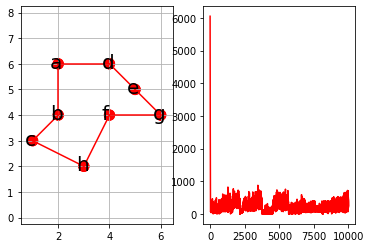

In [ ]:
'''
连续型——Hopfield神经网络求解TSP
1、初始化权值（A,D,U0）
2、计算N个城市的距离矩阵dxy
3、初始化神经网络的输入电压Uxi和输出电压Vxi
4、利用动力微分方程计算：dUxi/dt
5、由一阶欧拉方法更新计算：Uxi(t+1) = Uxi(t) + dUxi/dt * step
6、由非线性函数sigmoid更新计算：Vxi(t) = 0.5 * (1 + th(Uxi/U0))
7、计算能量函数E
8、检查路径是否合法
'''
import numpy as np
from matplotlib import pyplot as plt
# 代价函数（具有三角不等式性质）
def price_cn(vec1, vec2):
    return np.linalg.norm(np.array(vec1) - np.array(vec2))
def calc_distance(path):
    dis = 0.0
    for i in range(len(path) - 1):
        dis += distance[path[i]][path[i+1]]
    return dis
# 得到城市之间的距离矩阵
def get_distance(citys):
    N = len(citys)
    distance = np.zeros((N, N))
    for i, curr_point in enumerate(citys):
        line = []
        [line.append(price_cn(curr_point, other_point)) if i != j else line.append(0.0) for j, other_point in enumerate(citys)]
        distance[i] = line
    return distance
# 动态方程计算微分方程du
def calc_du(V, distance):
    a = np.sum(V, axis=0) - 1  # 按列相加
    b = np.sum(V, axis=1) - 1  # 按行相加
    t1 = np.zeros((N, N))
    t2 = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            t1[i, j] = a[j]
    for i in range(N):
        for j in range(N):
            t2[j, i] = b[j]
    # 将第一列移动到最后一列
    c_1 = V[:, 1:N]
    c_0 = np.zeros((N, 1))
    c_0[:, 0] = V[:, 0]
    c = np.concatenate((c_1, c_0), axis=1)
    c = np.dot(distance, c)
    return -A * (t1 + t2) - D * c
# 更新神经网络的输入电压U
def calc_U(U, du, step):
    return U + du * step
# 更新神经网络的输出电压V
def calc_V(U, U0):
    return 1 / 2 * (1 + np.tanh(U / U0))
# 计算当前网络的能量
def calc_energy(V, distance):
    t1 = np.sum(np.power(np.sum(V, axis=0) - 1, 2))
    t2 = np.sum(np.power(np.sum(V, axis=1) - 1, 2))
    idx = [i for i in range(1, N)]
    idx = idx + [0]
    Vt = V[:, idx]
    t3 = distance * Vt
    t3 = np.sum(np.sum(np.multiply(V, t3)))
    e = 0.5 * (A * (t1 + t2) + D * t3)
    return e
# 检查路径的正确性
def check_path(V):
    newV = np.zeros([N, N])
    route = []
    for i in range(N):
        mm = np.max(V[:, i])
        for j in range(N):
            if V[j, i] == mm:
                newV[j, i] = 1
                route += [j]
                break
    return route, newV
# 可视化画出哈密顿回路和能量趋势
def draw_H_and_E(citys, H_path, energys):
    fig = plt.figure()
    # 绘制哈密顿回路
    ax1 = fig.add_subplot(121)
    plt.xlim(0, 7)
    plt.ylim(0, 7)
    for (from_, to_) in H_path:
        p1 = plt.Circle(citys[from_], 0.2, color='red')
        p2 = plt.Circle(citys[to_], 0.2, color='red')
        ax1.add_patch(p1)
        ax1.add_patch(p2)
        ax1.plot((citys[from_][0], citys[to_][0]), (citys[from_][1], citys[to_][1]), color='red')
        ax1.annotate(s=chr(97 + to_), xy=citys[to_], xytext=(-8, -4), textcoords='offset points', fontsize=20)
    ax1.axis('equal')
    ax1.grid()
    # 绘制能量趋势图
    ax2 = fig.add_subplot(122)
    ax2.plot(np.arange(0, len(energys), 1), energys, color='red')
    plt.show()
if __name__ == '__main__':
    citys = np.array([[2, 6], [2, 4], [1, 3], [4, 6], [5, 5], [4, 4], [6, 4], [3, 2]])
    distance = get_distance(citys)
    N = len(citys)
    # 设置初始值
    A = N * N
    D = N / 2
    U0 = 0.0009  # 初始电压
    step = 0.0001  # 步长
    num_iter = 10000  # 迭代次数
    # 初始化神经网络的输入状态（电路的输入电压U）
    U = 1 / 2 * U0 * np.log(N - 1) + (2 * (np.random.random((N, N))) - 1)
    # 初始化神经网络的输出状态（电路的输出电压V）
    V = calc_V(U, U0)
    energys = np.array([0.0 for x in range(num_iter)])  # 每次迭代的能量
    best_distance = np.inf  # 最优距离
    best_route = []  # 最优路线
    H_path = []  # 哈密顿回路
    # 开始迭代训练网络
    for n in range(num_iter):
        # 利用动态方程计算du
        du = calc_du(V, distance)
        # 由一阶欧拉法更新下一个时间的输入状态（电路的输入电压U）
        U = calc_U(U, du, step)
        # 由sigmoid函数更新下一个时间的输出状态（电路的输出电压V）
        V = calc_V(U, U0)
        # 计算当前网络的能量E
        energys[n] = calc_energy(V, distance)
        # 检查路径的合法性
        route, newV = check_path(V)
        if len(np.unique(route)) == N:
            route.append(route[0])
            dis = calc_distance(route)
            if dis < best_distance:
                H_path = []
                best_distance = dis
                best_route = route
                [H_path.append((route[i], route[i + 1])) for i in range(len(route) - 1)]
                print('第{}次迭代找到的次优解距离为：{}，能量为：{}，路径为：'.format(n, best_distance, energys[n]))
                [print(chr(97 + v), end=',' if i < len(best_route) - 1 else '\n') for i, v in enumerate(best_route)]
    if len(H_path) > 0:
        draw_H_and_E(citys, H_path, energys)
    else:
        print('没有找到最优解')